# Project - Support-Vector Classification
- Classify dogs

### Classification task
- 3 dog types and corresponding data

<table>
    <tr>
        <td>Dobermann</td>
        <td><img src="img/dobermann.jpg" width="100" align="left"></td>
    </tr>
    <tr>
        <td>German Shepherd</td>
        <td><img src="img/german_shepherd.jpg" width="100" align="left"></td>
    </tr>
    <tr>
        <td>Rottweiler</td>
        <td><img src="img/rottweiler.jpg" width="100" align="left"></td>
    </tr>
</table>

### Step 1: Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.svm import SVC

### Step 2: Read the data
- Use Pandas [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method to read **files/data_02.csv**

In [3]:
data = pd.read_csv('files/data_02.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Weight  300 non-null    float64
 1   Height  300 non-null    int64  
 2   Class   300 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
data['Class'].unique()

array(['Dobermann', 'Rottweiler', 'German Shepherd'], dtype=object)

### Step 3: Make class IDs
- Note: The model works with name classes - but often it is convenient to use numbers for classes
- Create a dictionary to map class names to integers numbers.
    - Hint: **class_ids = {'Dobermann': 0, 'German Shepherd': 1, 'Rottweiler': 2}**
- Create a column with **Class ID**
    - Hint: you can use **apply(lambda x: class_ids[x])**

Without the transfomation you can not visualize it with colors, ie color mapping.

In [5]:
# transfomring name classes into number classes 
class_ids = {'Dobermann':0, 'Rottweiler':1, 'German Shepherd':2}
# lambda is applied on each row of the data['Class']
# if Dobermann, then it will map it to zero.
data['Class ID'] = data['Class'].apply(lambda x:class_ids[x])
data.head()

,Weight,Height,Class,Class ID
0,42.2,66,Dobermann,0
1,43.0,70,Dobermann,0
2,39.2,67,Dobermann,0
3,49.9,63,Rottweiler,1
4,39.5,65,German Shepherd,2


### Step 4: Scatter plot the data
- Create a figure and axes (**fig, ax**) from matplotlib.pyplot (**plt**)
- Make a scatter plot using the **Class ID** column as color.
    - Hint: [Docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) use **Weight** and **Height** for **x** and **y**, respectively.

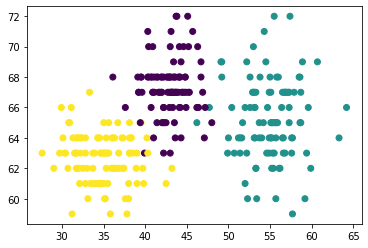

In [6]:
fig, ax = plt.subplots()
# we can see that this data is quite easy to classify.
ax.scatter(x=data['Weight'], y=data['Height'], c=data['Class ID'])

### Step 5: Fit a model
- Use the **SVC** model with **kernel='linear'**
- Fit the model

In [7]:
clf = SVC(kernel='linear')
clf.fit(data[['Weight', 'Height']], data['Class ID'])

SVC(kernel='linear')

### Step 6: Map out the classification
- Create a random selection of data
    - HINT: use **np.random.rand(10000, 2)** and "shift" the data with ***(40, 20) + (25, 55)**
- Predict the random selction of data
- Create a plot with the data and predictions

[random.rand](https://numpy.org/doc/stable/reference/random/generated/numpy.random.rand.html#numpy.random.rand)
 - Create an array of the given shape populate with random samples from uniform distribution over [0, 1)

In [8]:
randomset = np.random.rand(10000, 2) # 10000 random samples
print(randomset)
randomset = randomset*(40, 20) + (25, 55)
randomset

[[0.24766161 0.71871256]
 [0.17650632 0.34009429]
 [0.2495326  0.00563883]
 ...
 [0.62744425 0.00151953]
 [0.91519328 0.56738214]
 [0.42645047 0.81320102]]


array([[34.90646445, 69.37425115],
       [32.06025271, 61.80188585],
       [34.98130381, 55.11277662],
       ...,
       [50.09777012, 55.03039055],
       [61.60773105, 66.34764283],
       [42.05801877, 71.26402033]])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


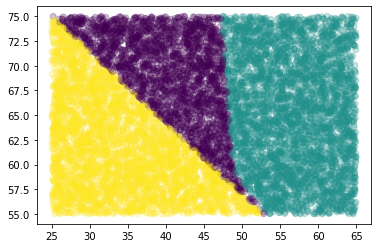

In [9]:
y_pred = clf.predict(randomset)

fig, ax = plt.subplots()
ax.scatter(x=randomset[:, 0], y=randomset [:, 1], c=y_pred ,alpha=.25)

### Step 7 (Optional): Map with original data points
- Make the same plot
- Add the data points from the original dataset
    - You might need to make a color mapping
    - Say, **colors = ['b', 'r', 'g']** and use it on the **Class ID** column with **apply**.

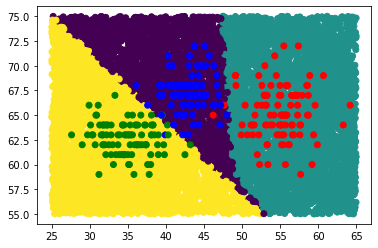

In [10]:
fig, ax = plt.subplots()
ax.scatter(x=randomset[:, 0], y=randomset [:, 1], c=y_pred)

colors = ['b', 'r', 'g']
# wrong
# data['Class ID'] = data['Class ID'].apply(lambda x: class_ids[x])
# ax.scatter(x=randomset[:, 0], y=randomset[:, 1])
y_colors = data['Class ID'].apply(lambda x: colors[x])
ax.scatter(x=data['Weight'], y=data['Height'], c=y_colors)
# its impossible to predict with linear separators.
# two lines seems pretty right.

In [11]:
# regression(guessing real numbers not intgers) != classification